# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [1]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create time series dataset

<AxesSubplot:>

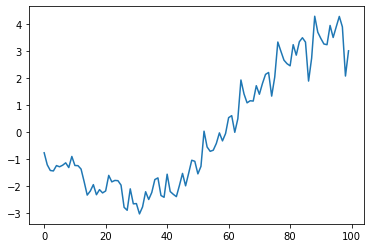

In [2]:
X = cuml.make_arima(
    batch_size=10
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , output_type='cudf'
    , random_state=np.random.randint(1e9)
)
X.head()

X.loc[:, 0].to_pandas().plot(kind='line')

---

# Time series models

---

#### ExponentialSmoothing()

In [3]:
exp_smooth = cuml.ExponentialSmoothing(
    X
    , seasonal='mul'
    , seasonal_periods=2
    , ts_num=10
)

In [4]:
exp_smooth.fit()

ExponentialSmoothing(endog=           0          1          2         3         4          5         6  \
0  -0.768396   0.698971  -0.779485 -0.031174 -0.659566   0.825950  0.978285   
1  -1.212681   0.633309  -0.536697  0.176898 -0.466222   1.304169  1.368427   
2  -1.423454   0.864678  -0.643328 -0.224429 -0.544231   0.905116  1.288593   
3  -1.440623   0.532086  -0.175800 -0.471901 -0.722273   0.952000  0.893393   
4  -1.242263   0.878765   0.286615 -0.262144 -0.353312   1.017183  1.392421   
..       ...        ...        ...       ...       ...        ...       ...   
95  3.891109  10.063788  12.810825  9.799834 -2.742097  20.426766  5.072586   
96  4.275107  10.433551  13.411272  9.389939 -2.030352  20.015644  5.329988   
97  3.889027  10.756860  13.152676  9.705356 -2.463872  22.573874  6.212792   
98  2.070247  10.461943  12.698203  9.371619 -2.817158  24.237883  6.264879   
99  3.003545  10.269273  14.175807  9.073553 -3.629977  23.048432  6.584136   

           7         8  

<AxesSubplot:>

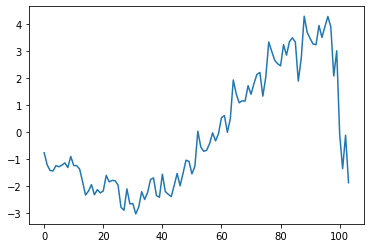

In [5]:
cudf.concat([X, exp_smooth.forecast(4)]).reset_index().loc[:,0].to_pandas().plot(kind='line')

In [6]:
exp_smooth.get_level()

,0,1,2,3,4,5,6,7,8,9
0,0.652488,0.958198,2.494545,3.416687,4.915539,5.542477,7.539750,8.127658,9.195781,9.576846
1,0.399438,0.986229,2.693327,4.342055,4.968686,5.920472,8.139230,9.328191,11.257257,11.907081
2,0.590210,0.831028,2.994964,4.419788,4.798745,5.488014,7.023409,7.049376,11.479602,12.337821
3,0.557304,0.699311,2.464877,3.606018,4.110171,5.478087,7.520860,9.160128,13.462081,14.744984
4,-0.146994,1.419724,1.304328,1.796713,1.056801,2.096925,3.740080,5.855357,13.234760,15.369735
...,...,...,...,...,...,...,...,...,...,...
93,-0.004842,0.039156,-0.072809,224.983102,-2.910280,-7.842164,-741.335077,-8244.826600,8.393790,7.584278
94,-0.011025,0.015233,-0.026991,60.105029,-4.664002,6.948027,-425.770839,-5736.884073,8.565954,8.062681
95,0.008741,-0.032366,0.015843,-74.667377,-1.362473,28.209218,-110.332081,-2256.518732,7.092790,7.227225
96,0.004488,-0.014981,-0.097230,-98.098569,0.212730,18.290507,-232.380359,-2684.989018,6.924790,6.904942


In [7]:
exp_smooth.get_season()

,0,1,2,3,4,5,6,7,8,9
0,-0.681742,0.765860,0.916605,1.020608,1.031584,0.940249,1.011582,1.039867,1.022370,1.008397
1,1.699938,1.081544,1.005596,0.987927,0.911353,1.018079,0.972644,0.970176,0.985100,0.997638
2,-0.812473,0.563357,0.835436,0.847330,0.901646,0.799722,0.834013,0.752265,0.970789,0.971958
3,1.634571,0.860034,0.777167,0.734126,0.765786,0.946711,0.956289,1.034839,0.988866,1.007384
4,-2.565317,0.675931,0.402680,0.330263,-0.398376,0.118632,0.384467,0.494080,0.929601,0.953148
...,...,...,...,...,...,...,...,...,...,...
93,-32.538167,12.682217,-22.763180,0.011868,-0.610586,-0.079285,-0.011216,-0.001273,1.120066,1.198744
94,-65.019888,16.063197,-2.527673,-0.006665,0.562322,-0.187529,-0.005312,-0.000749,0.651674,0.777549
95,-68.302003,19.562969,-45.630732,0.018838,0.256475,-0.096816,0.000756,-0.000443,1.045325,1.152251
96,-5.856687,-2.153653,-4.061881,-0.005347,2.088816,-0.088439,-0.007956,-0.000953,0.652232,0.769729


In [8]:
exp_smooth.get_trend()

,0,1,2,3,4,5,6,7,8,9
0,0.021684,0.462957,1.187692,2.096990,1.653292,1.824105,2.072391,2.419509,2.464293,2.534876
1,-0.060737,0.332467,0.891020,1.745519,1.173248,1.390272,1.619327,2.053816,2.357715,2.463124
2,0.014716,0.186153,0.714206,1.245206,0.770292,0.843453,0.778002,0.754027,1.792737,1.750521
3,0.000429,0.090783,0.340919,0.627541,0.332632,0.587439,0.691705,1.161045,1.842939,1.980756
4,-0.210989,0.279690,-0.109520,-0.103480,-0.683168,-0.603141,-0.684020,-0.178700,1.295189,1.505308
...,...,...,...,...,...,...,...,...,...,...
93,0.000385,-0.002071,-0.008973,17.374871,-0.673967,4.233114,-61.958824,-773.193380,0.307705,0.422897
94,-0.001585,-0.008627,0.007464,-37.298541,-0.997893,7.400237,54.166361,211.147392,0.271843,0.442359
95,0.004820,-0.020320,0.018075,-66.539379,0.291933,11.558523,134.533122,1191.912777,-0.189852,-0.005674
96,0.002098,-0.009007,-0.021269,-53.607507,0.676914,5.115353,55.609301,705.797858,-0.184070,-0.116685


In [9]:
exp_smooth.score()

0      1447.627417
1       558.708247
2      2663.312366
3      2709.876536
4      2894.742174
5     50394.047192
6      9378.995229
7    209636.267626
8      4767.611488
9      6555.092808
dtype: float64

#### tsa.ARIMA()

In [10]:
arima = cuml.ARIMA(X, (2,1,2), (0,1,2,12), fit_intercept=False)

In [11]:
arima.fit()

ARIMA(order={'p': 2, 'd': 1, 'q': 2, 'P': 0, 'D': 1, 'Q': 2, 's': 12, 'k': 0}, simple_differencing=True, handle=<cuml.raft.common.handle.Handle object at 0x7f2ea4cd3430>, verbose=4, output_type='input')

In [12]:
arima.forecast(4)

,0,1,2,3,4,5,6,7,8,9
0,4.665946,10.598692,14.541532,9.504883,-3.996162,23.436400,7.120767,-2.679163,3.580870,3.501515
1,3.913203,10.632380,14.156267,9.361159,-5.456037,24.633178,7.637412,-2.576783,4.862848,2.582509
2,3.661241,10.809664,14.413405,10.066682,-5.199309,24.831605,7.550487,-3.353768,4.276860,0.500250
3,3.549773,10.773160,15.368149,9.619097,-4.446766,23.173248,7.727608,-2.812212,3.981014,0.243710


<AxesSubplot:>

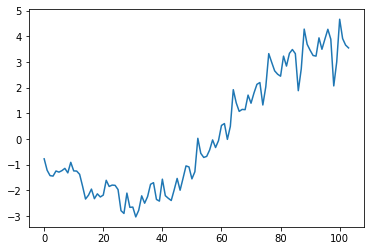

In [13]:
cudf.concat([X, arima.forecast(4)]).reset_index().loc[:,0].to_pandas().plot(kind='line')

[W] [06:02:24.927397] WARNING(`predict`): predictions before 13 are undefined, will be set to NaN


<AxesSubplot:>

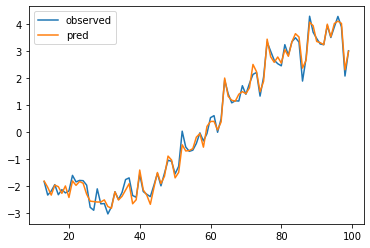

In [14]:
df = X.loc[:,0].to_frame(name='observed')
df['pred'] = arima.predict(0, 100).loc[:,0]
df.loc[13:].to_pandas().plot(kind='line')